**Created on 05/01/2022**

**Group 2**

**Authors: LaurianeBompay**

**License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**


In [1]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
sns.set_style('darkgrid')

In [3]:
#data importation 
data_1 = pd.read_csv("data_v6.csv")
#data_0 = pd.read_csv("positions.csv")

Il faudra changer l'imporation des données quand on aura le jeu de données avec les changements de repaires.

In [4]:
data_1.describe()

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,loc_target_x,loc_target_y,loc_target_z,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
count,3946.000000,3946.000000,3.946000e+03,3.946000e+03,3.946000e+03,3.946000e+03,3946.000000,3946.000000,3946.000000,3946.000000,...,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,148.315256,7.215384,5.505930e+11,5.509284e+11,5.510320e+11,5.506966e+11,-2.755970,999.946275,1142.269047,4.690093,...,1.452085,5.878422,2.651427,39.577380,39.555326,-81.090100,-80.970815,-80.836828,-80.965914,81.495692
std,35.805126,19.476255,3.164409e+11,3.164412e+11,3.164412e+11,3.164409e+11,3.762459,674.344209,646.710484,3.162907,...,5.091560,2.249992,0.003063,2.341864,3.782210,5.635798,5.072976,4.818267,5.131755,96.093454
min,100.000000,0.000000,6.062043e+07,2.633300e+08,3.679996e+08,1.652910e+08,-11.659438,-613.000000,-152.480214,-2.875181,...,-3.962000,2.793000,2.650000,30.410000,27.559999,-120.000000,-120.000000,-120.000000,-120.000000,0.000000
25%,101.000000,2.956510,2.778704e+11,2.782606e+11,2.783633e+11,2.779731e+11,-5.783573,655.250000,715.863760,3.073348,...,-3.132000,4.339000,2.650000,38.959999,36.680000,-79.967224,-79.988684,-79.884079,-79.886862,0.000000
50%,171.000000,3.524929,5.528798e+11,5.532044e+11,5.533074e+11,5.529824e+11,-1.784294,898.000000,998.316717,4.211930,...,-1.190000,4.578000,2.650000,40.384998,39.340000,-79.230034,-79.305238,-79.218111,-79.237715,90.000000
75%,180.000000,4.342234,8.238901e+11,8.243201e+11,8.244236e+11,8.239937e+11,0.338401,1222.000000,1355.367840,5.731602,...,6.169000,7.931000,2.650000,41.240002,42.380001,-78.659598,-78.701023,-78.666953,-78.686799,119.000000
max,184.000000,342.462982,1.099128e+12,1.099376e+12,1.099479e+12,1.099231e+12,4.829899,2636.000000,2860.190262,12.363750,...,11.442000,9.249000,2.658000,42.380001,47.320004,-77.162437,-77.516188,-77.428716,-77.478065,270.000000


In [5]:
data_1.head()

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,loc_target_x,loc_target_y,loc_target_z,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,-3.962,7.931,2.65,30.98,30.220001,-80.136574,-80.077130,-79.836296,-80.016667,270.0
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,-3.962,7.931,2.65,30.98,29.840002,-80.267769,-79.988684,-79.835720,-80.030724,270.0
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,-3.962,7.931,2.65,30.98,29.840002,-79.964310,-79.850138,-79.693502,-79.835983,270.0
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,-3.962,7.931,2.65,30.98,29.840002,-80.040833,-79.818313,-79.849525,-79.902890,270.0
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,-3.962,7.931,2.65,30.98,29.840002,-79.999908,-80.102552,-80.022316,-80.041592,270.0


## <center>Remplacement des -inf</center>

In [6]:
data_1.replace([-np.inf], -120, inplace=True)

Les -inf sont dans les rssi et indique que le signal est très mauvais (ce n'est pas un nan) donc on remplace par -120 car c'est la valeur qui indique un mauvais signal (voir la doc sur les rssi)

## <center>Test du modèle random forest pour determiner le position (x,y)</center>

In [7]:
def score_distanceM(Xobserve:float, Yobserve:float, Xprevu:float, Yprevu:float) -> float:
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

### Selection des variables pour la prédiction de position

In [69]:
data_test_train = data_1[data_1['target']!=171]
data_validation = data_1[data_1['target']==171]

On supprime target pour la prediction

In [70]:
data_for_pred = data_test_train.drop('target',axis=1,inplace=False)

In [71]:
var = data_for_pred.columns.to_list()
y=data_for_pred[['loc_initiator_x','loc_initiator_y']]

In [72]:
#ceration of test and train
test,train = train_test_split(data_for_pred, test_size=0.25, train_size=0.75, shuffle=True)
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [73]:
X_train.describe()

,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,loc_target_x,loc_target_y,loc_target_z,temperature_initiator,temperature_target,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
count,811.000000,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,8.110000e+02,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.457861,5.558131e+11,5.561722e+11,5.562757e+11,5.559166e+11,-3.638422,1068.545006,1256.525792,5.011845,5.893539,2.161644,6.160223,2.650000e+00,39.470962,39.866189,-81.912547,-81.637493,-81.563344,-81.704461,98.874229
std,20.918864,3.221272e+11,3.221266e+11,3.221266e+11,3.221273e+11,3.630467,743.122187,663.333309,3.485499,3.111262,5.443300,2.407305,3.999269e-14,2.387617,3.935961,6.646804,5.747475,5.672691,5.954714,96.234892
min,0.000000,2.789119e+09,3.061770e+09,3.165892e+09,2.893245e+09,-11.659438,-613.000000,-105.039218,-2.875181,-0.492670,-3.962000,2.793000,2.650000e+00,30.410000,27.559999,-120.000000,-120.000000,-120.000000,-114.500452,0.000000
25%,2.884487,2.649921e+11,2.654593e+11,2.655624e+11,2.650952e+11,-6.444992,763.000000,884.159840,3.578733,4.147015,-3.132000,4.339000,2.650000e+00,38.389999,36.680000,-80.210499,-80.203859,-80.135335,-80.140178,0.000000
50%,3.533907,5.568419e+11,5.573507e+11,5.574540e+11,5.569452e+11,-2.245749,975.000000,1212.007927,4.573086,5.684735,2.120000,7.657000,2.650000e+00,40.384998,40.099998,-79.410164,-79.518167,-79.446260,-79.478273,90.000000
75%,4.518429,8.398033e+11,8.401517e+11,8.402556e+11,8.399072e+11,-0.922911,1281.000000,1437.318817,6.008332,6.741521,6.169000,7.931000,2.650000e+00,41.240002,42.380001,-78.889721,-78.915645,-78.912143,-78.904849,119.000000
max,223.071976,1.098653e+12,1.099042e+12,1.099146e+12,1.098757e+12,1.568948,2622.000000,2790.850758,12.298084,13.090053,11.442000,9.249000,2.650000e+00,42.095001,47.320004,-77.789719,-77.841382,-77.576361,-77.874253,270.000000


#### Premier modele avec toutes les variables

In [150]:
reg = RandomForestRegressor()
reg = reg.fit(X_train, Y_train)
predic_rf=reg.predict(X_test)

In [151]:
reg.score(X_test,Y_test)

0.9674293007975261

In [152]:
np.sqrt(mean_squared_error(Y_test,predic_rf))

0.25813069570235225

In [153]:
mean_absolute_error(Y_test, predic_rf)

0.15896748046071554

In [154]:
score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                Yobserve = Y_test['loc_initiator_y'],
                Xprevu = predic_rf[:,0],
                Yprevu = predic_rf[:,1])

0.23384529143602123

#### Affichage de ce premier modele

In [79]:
predic_position = pd.DataFrame(predic_rf, columns=['loc_initiator_x','loc_initiator_y'])

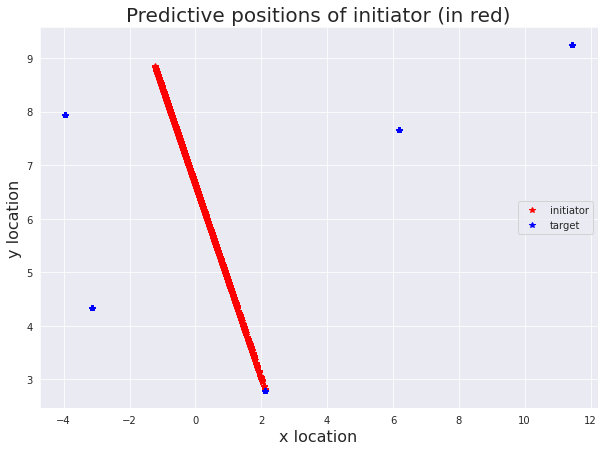

In [80]:
plt.figure(figsize=(10, 7))
plt.plot(predic_position['loc_initiator_x'],predic_position['loc_initiator_y'],'*r',label='initiator')
plt.plot(data_for_pred['loc_target_x'],data_for_pred['loc_target_y'],"*b", label='target')
plt.xlabel("x location", fontsize=16)
plt.ylabel("y location", fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
plt.title('Predictive positions of initiator (in red)', fontsize=20);

In [81]:
from sklearn.metrics import accuracy_score
list_variable=list(data_for_pred.columns)
list_variable_tabou=list_variable
variable=[]
score=0
data_for_pred=data_for_pred.sample(frac=1).reset_index(drop=True)
while len(list_variable_tabou)>0:
    y=data_for_pred[['loc_initiator_x','loc_initiator_y']]
    variable_en_cour=False
    for i in list_variable_tabou:
        X=data_for_pred[variable+[i]]
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        clf = RandomForestRegressor()
        clf= clf.fit(x_train, y_train)
        score_test=clf.score(x_test,y_test)
    if score_test>score:
        score=score_test
        variable_en_cour=i
    if not(variable_en_cour):
        list_variable_tabou=[]
    else:
        variable.append(variable_en_cour)
        del list_variable_tabou[list_variable_tabou.index(variable_en_cour)]
    print(variable_en_cour,score)

orientation 0.018936038778316344
False 0.018936038778316344


Cet algo me dit qu'il faut garder juste orientation... Ça semble faux.

In [82]:
reg = RandomForestRegressor()
sfs = SequentialFeatureSelector(reg, direction='forward')
sfs.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=RandomForestRegressor())

In [83]:
var_select = sfs.get_support()
list_var_select=['loc_initiator_x','loc_initiator_y']
list_variable = X_train.columns.to_list()
for i in range(len(list_variable)) :
    if var_select[i]:
        list_var_select.append(list_variable[i])
        print(list_variable[i])

tof
tof_skew
range
range_skew
loc_target_x
loc_target_y
loc_target_z
temperature_initiator
temperature_target
orientation


#### Deuxième modèle avec les variables sélectionnées : nlos_indicator, skew, tof, tof_skew, loc_target_y, rssi_data,rssi_mean

In [84]:
data_for_pred_select = data_for_pred[list_var_select]

In [85]:
#ceration of test and train with selected variables
test,train = train_test_split(data_for_pred_select, test_size=0.3, train_size=0.7, shuffle=True)
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [86]:
reg = RandomForestRegressor()
reg = reg.fit(X_train, Y_train)
predic_rf_2=reg.predict(X_test)
reg.score(X_test,Y_test)

0.9859486164163607

In [90]:
np.sqrt(mean_squared_error(Y_test,predic_rf_2))

0.16960302255075457

In [91]:
mean_absolute_error(Y_test,predic_rf_2)

0.1002324151608638

In [92]:
score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                Yobserve = Y_test['loc_initiator_y'],
                Xprevu = predic_rf_2[:,0],
                Yprevu = predic_rf_2[:,1])

0.14744905396801888

In [93]:
predic_position_2 = pd.DataFrame(predic_rf_2, columns=['loc_initiator_x','loc_initiator_y'])

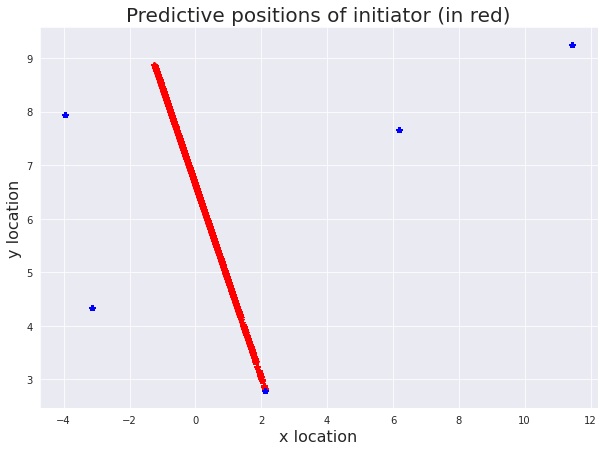

In [94]:
plt.figure(figsize=(10, 7))
plt.plot(predic_position_2['loc_initiator_x'],predic_position_2['loc_initiator_y'],'*r')
plt.plot(data_for_pred['loc_target_x'],data_for_pred['loc_target_y'],"*b")
plt.xlabel("x location", fontsize=16)
plt.ylabel("y location", fontsize=16)
plt.title('Predictive positions of initiator (in red)', fontsize=20);

### Validation croisée

In [95]:
Y = data_for_pred[['loc_initiator_x', 'loc_initiator_y']]
X = data_for_pred.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [96]:
reg = RandomForestRegressor()
cross_val_score(reg, X, Y, cv=5)

array([0.98462719, 0.98210528, 0.98746378, 0.9888878 , 0.98609303])

## <center>Affichage du score de RandomForest en fonction des paramètres</center>

#### On va faire varier n_estimators qui correspond au nombre d'arbres de décisions utilisés.

In [97]:
scores_estimators = []

In [98]:
reg_50 = RandomForestRegressor(n_estimators = 1)
reg_50 = reg_50.fit(X_train, Y_train)
scores_estimators.append(reg_50.score(X_test,Y_test))

In [99]:
reg_100 = RandomForestRegressor(n_estimators = 100)
reg = reg_100.fit(X_train, Y_train)
scores_estimators.append(reg_100.score(X_test,Y_test))

In [100]:
reg_150 = RandomForestRegressor(n_estimators = 150)
reg_150 = reg_150.fit(X_train, Y_train)
scores_estimators.append(reg_150.score(X_test,Y_test))

In [101]:
reg_200 = RandomForestRegressor(n_estimators = 200)
reg_200 = reg_200.fit(X_train, Y_train)
scores_estimators.append(reg_200.score(X_test,Y_test))

In [102]:
scores_estimators

[0.9686084956288927,
 0.9862703649011717,
 0.9862584546244232,
 0.9862040259534892]

/home/sid2019-6/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores with different number of trees')

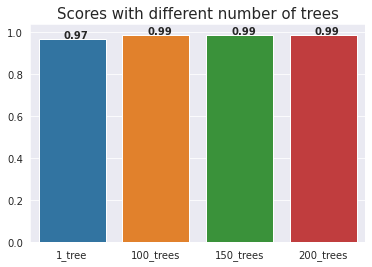

In [103]:
sns.barplot(['1_tree','100_trees','150_trees', '200_trees'],scores_estimators)
plt.text(-0.1, round(scores_estimators[0],2), round(scores_estimators[0],2), horizontalalignment='left', weight='semibold')
plt.text(0.9,round(scores_estimators[1],2), round(scores_estimators[1],2), horizontalalignment='left', weight='semibold')
plt.text(1.9, round(scores_estimators[2],2), round(scores_estimators[2],2), horizontalalignment='left', weight='semibold')
plt.text(2.9, round(scores_estimators[3],2), round(scores_estimators[3],2), horizontalalignment='left', weight='semibold')
plt.title("Scores with different number of trees",fontsize=15)

À partir de 100 arbres, le score ne change plus. 100 arbres est la valeur par défaut de RandomForest

#### On va faire varier max_depth qui correspond au nombre d'arbres de décisions utilisés.

In [104]:
scores_depth = []

In [105]:
reg_3 = RandomForestRegressor(max_depth = 3)
reg_3 = reg_3.fit(X_train, Y_train)
scores_depth.append(reg_3.score(X_test,Y_test))

In [106]:
reg_15 = RandomForestRegressor(max_depth = 6)
reg_15 = reg_15.fit(X_train, Y_train)
scores_depth.append(reg_15.score(X_test,Y_test))

In [107]:
reg_30 = RandomForestRegressor(max_depth = 9)
reg_30 = reg_30.fit(X_train, Y_train)
scores_depth.append(reg_30.score(X_test,Y_test))

In [108]:
reg_300 = RandomForestRegressor(max_depth = 12)
reg_300 = reg_300.fit(X_train, Y_train)
scores_depth.append(reg_300.score(X_test,Y_test))

/home/sid2019-6/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores with different maximum depth')

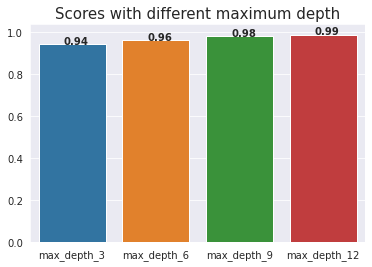

In [109]:
sns.barplot(['max_depth_3','max_depth_6','max_depth_9','max_depth_12'],scores_depth)
plt.text(-0.1, round(scores_depth[0],2), round(scores_depth[0],2), horizontalalignment='left', weight='semibold')
plt.text(0.9,round(scores_depth[1],2), round(scores_depth[1],2), horizontalalignment='left', weight='semibold')
plt.text(1.9, round(scores_depth[2],2), round(scores_depth[2],2), horizontalalignment='left', weight='semibold')
plt.text(2.9, round(scores_depth[3],2), round(scores_depth[3],2), horizontalalignment='left', weight='semibold')
plt.title("Scores with different maximum depth",fontsize=15)

#### On va faire varier max_depth et n_estimators en même temps 

In [110]:
list_estimators = [1,100,150,200]
list_depth = [3,6,9,12]

In [111]:
dic_score = {} #{max_depth : n_estimators}
for i in range(len(list_estimators)):
    n_estimator = list_estimators[i]
    list_score = []
    for j in range(len(list_estimators)):
        max_depth = list_depth[j]
        reg = RandomForestRegressor(max_depth = max_depth,n_estimators=n_estimator)
        reg = reg.fit(X_train, Y_train)
        list_score.append(reg.score(X_test,Y_test))
    dic_score[n_estimator]=list_score

In [112]:
dic_score

{1: [0.936964623087754,
  0.9457560721926976,
  0.963912871760198,
  0.9664171271421412],
 100: [0.9418282985067419,
  0.9634356691638026,
  0.9807654959345901,
  0.9857374569376282],
 150: [0.9420690744259956,
  0.9630531428917937,
  0.9811291421262198,
  0.9859767395008667],
 200: [0.9417425974444161,
  0.9636627732823463,
  0.9809013599497742,
  0.9859982463881237]}

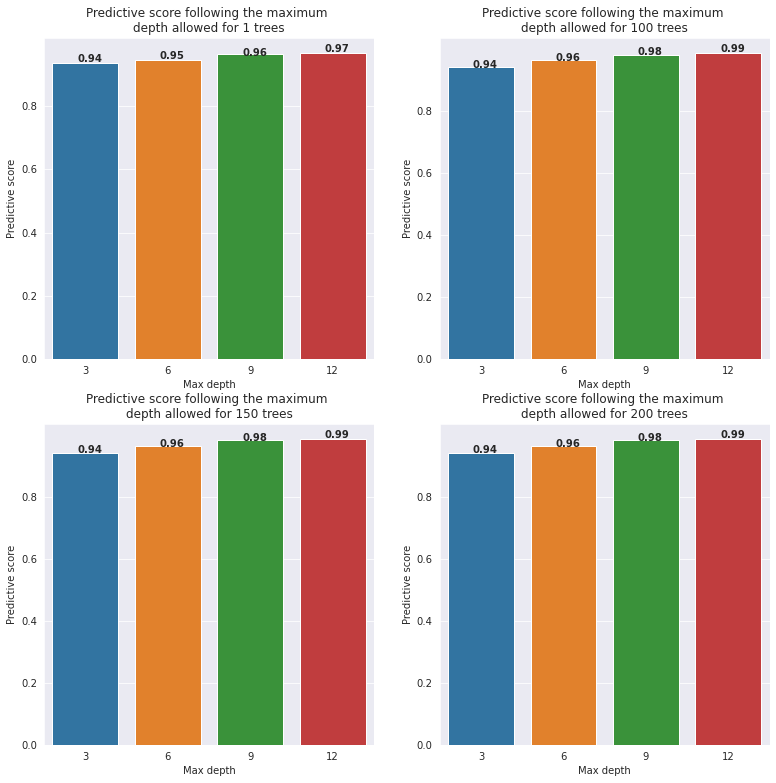

In [113]:
fig = plt.figure(figsize=(13,13))
i=1
for key in dic_score.keys() :
    ax = fig.add_subplot(2,2,i)
    bar1 = sns.barplot(x = list_depth,
                       y = dic_score[key])  
    plt.text(-0.1, round(dic_score[key][0],2), round(dic_score[key][0],2), horizontalalignment='left', weight='semibold')
    plt.text(0.9,round(dic_score[key][1],2), round(dic_score[key][1],2), horizontalalignment='left', weight='semibold')
    plt.text(1.9, round(dic_score[key][2],2), round(dic_score[key][2],2), horizontalalignment='left', weight='semibold')
    plt.text(2.9, round(dic_score[key][3],2), round(dic_score[key][3],2), horizontalalignment='left', weight='semibold')
    ax.set_xlabel("Max depth")       
    ax.set_ylabel("Predictive score")     
    ax.set_yticks(np.arange(0, 1,0.2))       
    ax.set_title("Predictive score following the maximum \ndepth allowed for "+str(key)+" trees")   
    i+=1

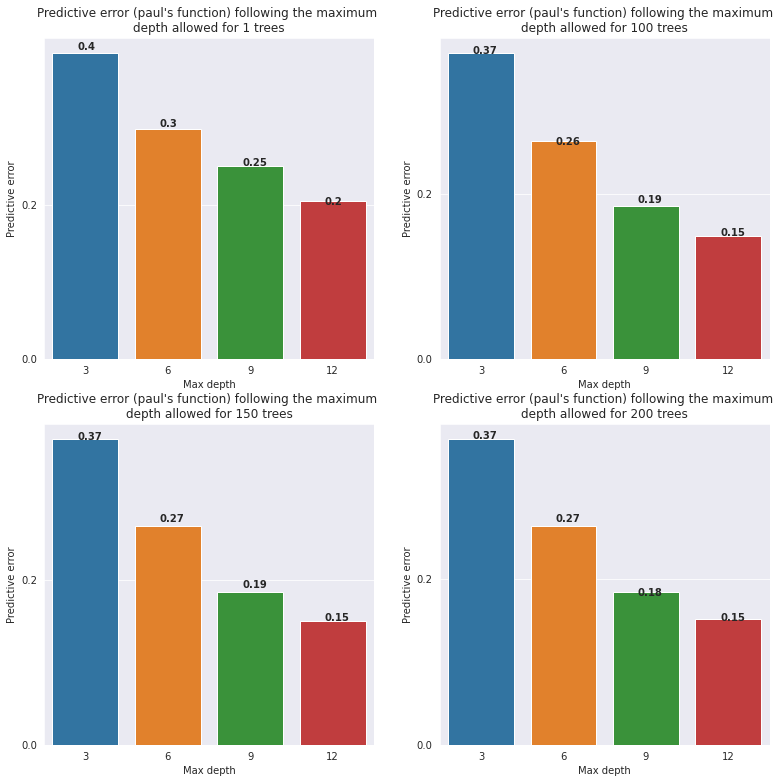

In [114]:
fig = plt.figure(figsize=(13,13))
k=1
for i in range(len(list_estimators)):
    n_estimator = list_estimators[i]
    list_erreur= []
    for j in range(len(list_depth)):
        max_depth = list_depth[j]
        reg = RandomForestRegressor(max_depth = max_depth,n_estimators=n_estimator)
        reg = reg.fit(X_train, Y_train)
        predic=reg.predict(X_test)
        list_erreur.append(score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                Yobserve = Y_test['loc_initiator_y'],
                Xprevu = predic[:,0],
                Yprevu = predic[:,1]))
    ax = fig.add_subplot(2,2,k)
    bar = sns.barplot(x = list_depth,
                      y = list_erreur)  
    plt.text(-0.1, round(list_erreur[0],2), round(list_erreur[0],2), horizontalalignment='left', weight='semibold')
    plt.text(0.9,round(list_erreur[1],2), round(list_erreur[1],2), horizontalalignment='left', weight='semibold')
    plt.text(1.9, round(list_erreur[2],2), round(list_erreur[2],2), horizontalalignment='left', weight='semibold')
    plt.text(2.9, round(list_erreur[3],2), round(list_erreur[3],2), horizontalalignment='left', weight='semibold')
    ax.set_xlabel("Max depth")       
    ax.set_ylabel("Predictive error")     
    ax.set_yticks(np.arange(0, max(list_erreur),0.2))       
    ax.set_title("Predictive error (paul's function) following the maximum \ndepth allowed for "+str(n_estimator)+" trees")   
    k+=1

Le maximum de profondeur a un effet sur la prédiction alors que le nombre d'arbre n'a pas beaucoup d'influence. Globalement, on observe la même évolution que ce soit pour 1 arbre ou 200 mais le score augment quand on augmente le maximum de profondeur.

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
parameters = {'max_depth':[3,6,9,12,20,30],
              'n_estimators':[1,100,150,200]}
reg = RandomForestRegressor()
clf = GridSearchCV(reg, parameters)
clf.fit(X, Y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 20, 30],
                         'n_estimators': [1, 100, 150, 200]})

In [117]:
clf.cv_results_

{'mean_fit_time': array([0.01204653, 0.72917333, 1.20730033, 1.59784937, 0.01918368,
        1.25907607, 1.86138468, 2.11494098, 0.01695609, 1.41793261,
        2.11785564, 2.76775298, 0.01842217, 1.62064972, 2.39731956,
        3.69176464, 0.02002764, 1.77263708, 2.58884215, 3.429286  ,
        0.02007284, 1.70877976, 2.63388805, 3.49295759]),
 'std_fit_time': array([2.45908832e-03, 1.20861728e-01, 8.88942432e-02, 9.30832518e-02,
        2.80190392e-03, 1.21944263e-01, 2.68191492e-01, 3.10559365e-02,
        7.54797661e-04, 2.66808324e-02, 2.63463264e-02, 3.35880728e-02,
        2.20591095e-04, 3.09018718e-02, 4.57083736e-02, 4.47985915e-01,
        4.04180941e-04, 1.39474816e-01, 6.76904369e-02, 2.72861800e-02,
        5.61659455e-04, 1.31991053e-02, 3.99038760e-02, 8.83917957e-02]),
 'mean_score_time': array([0.00288115, 0.01233201, 0.0187304 , 0.02440796, 0.00351224,
        0.01510625, 0.01840839, 0.01911907, 0.0024972 , 0.0129065 ,
        0.01805477, 0.02284389, 0.00224414, 0.01

In [118]:
params_opti = clf.cv_results_['params'][clf.best_index_]
params_opti

{'max_depth': 30, 'n_estimators': 100}

### Test avec les paramètres optimaux

In [119]:
test,train = train_test_split(data_for_pred, test_size=0.25, train_size=0.75, shuffle=True)
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [120]:
reg = RandomForestRegressor(max_depth = params_opti['max_depth'], n_estimators = params_opti['n_estimators'])
reg = reg.fit(X_train, Y_train)
predic_rf_opti=reg.predict(X_test)
reg.score(X_test,Y_test)

0.966263617126205

In [121]:
score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                Yobserve = Y_test['loc_initiator_y'],
                Xprevu = predic_rf_opti[:,0],
                Yprevu = predic_rf_opti[:,1])

0.23715756117715395

In [122]:
mean_absolute_error(Y_test, predic_rf_opti)

0.16121960510078173

In [123]:
np.sqrt(mean_squared_error(Y_test,predic_rf_opti))

0.26270844529416454

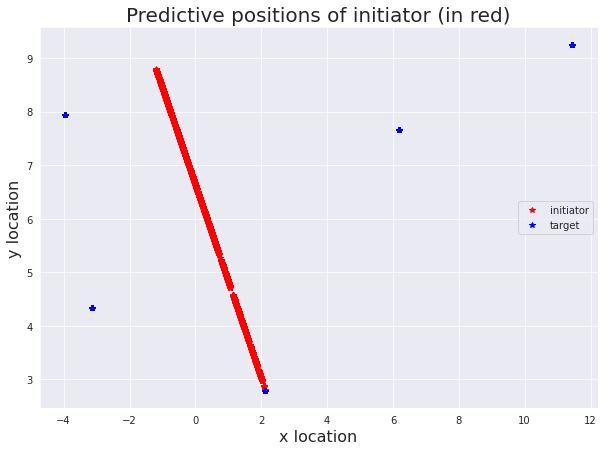

In [124]:
predic_position_opti = pd.DataFrame(predic_rf_opti, columns=['loc_initiator_x','loc_initiator_y'])
plt.figure(figsize=(10, 7))
plt.plot(predic_position_opti['loc_initiator_x'],predic_position_opti['loc_initiator_y'],'*r',label='initiator')
plt.plot(data_for_pred['loc_target_x'],data_for_pred['loc_target_y'],"*b", label='target')
plt.xlabel("x location", fontsize=16)
plt.ylabel("y location", fontsize=16)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
plt.title('Predictive positions of initiator (in red)', fontsize=20);